In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 
import scipy.stats as stats

1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

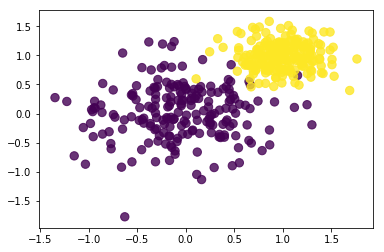

In [64]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

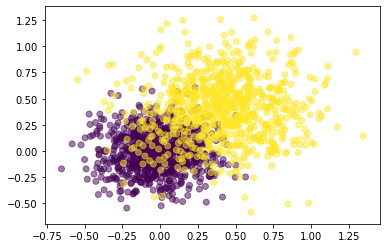

In [65]:
#function that generates 2D datasets
def DataSets(size, mean1, cov1, mean2, cov2):
    x1 = np.random.normal(mean1, cov1, size)
    y1 = np.random.normal(mean1, cov1, size)
    col1 = np.full(size, 1)
    x2 = np.random.normal(mean2, cov2, size)
    y2 = np.random.normal(mean2, cov2, size)
    col2 = np.full(size, 2)
    x = np.concatenate([x1, x2])
    y = np.concatenate([y1, y2])
    colors = np.concatenate([col1, col2])
    return x, y, colors

#means and covs to assign to the Gaussians
mean1 = 0
mean2 = 0.4
cov1 = 0.2
cov2 = 0.3

x, y, colors = DataSets(800, mean1, cov1, mean2, cov2)
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [22]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

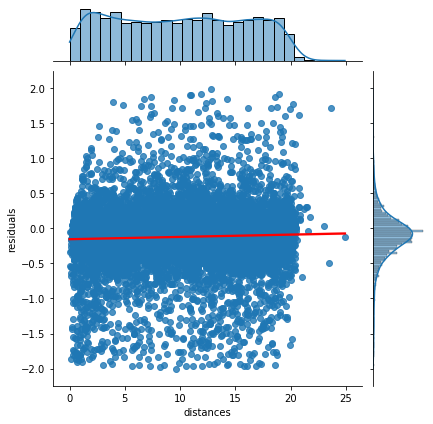

In [66]:
data = np.load("data/residuals_261.pkl", allow_pickle=True).item()
df = pd.DataFrame(data)
df = df[abs(df['residuals'])<2] #selection of residuals smaller than 2
sns.jointplot(x='distances', y='residuals', data=df, kind="reg", line_kws={'color':'red'})


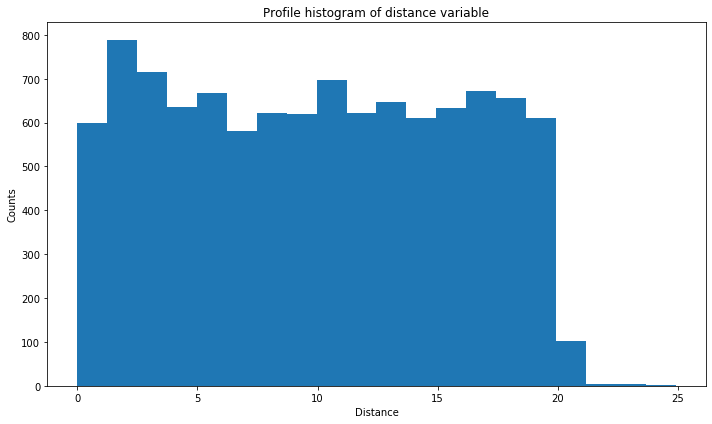

In [67]:
#create profile histogram of distance variable
fig, ax = plt.subplots(figsize=(10, 6)) 
h, bins, _ = plt.hist(df['distances'], bins=20) #create and plot the histogram
ax.set_title('Profile histogram of distance variable')
ax.set_xlabel('Distance')
ax.set_ylabel('Counts')
fig.tight_layout()

x:  [ 0.6225  1.8675  3.1125  4.3575  5.6025  6.8475  8.0925  9.3375 10.5825
 11.8275 13.0725 14.3175 15.5625 16.8075 18.0525 19.2975 20.5425 21.7875
 23.0325 24.2775] 

y:  [-0.20298651 -0.16346985 -0.16058613 -0.13457787 -0.13448661 -0.09600764
 -0.09284342 -0.08822673 -0.0591651  -0.08039035 -0.11016332 -0.14977026
 -0.13796675 -0.15048569 -0.13854145 -0.07072831  0.05114286  0.20133333
  0.41285714 -0.12857143] 

err_y:  [0.46906745 0.42093315 0.40510863 0.4152323  0.41254988 0.47127579
 0.41610324 0.41383771 0.46252125 0.46764395 0.49306768 0.44858705
 0.47054736 0.4176323  0.41132145 0.38352696 0.49544021 0.14407945
 1.15402844        nan]


<ErrorbarContainer object of 3 artists>

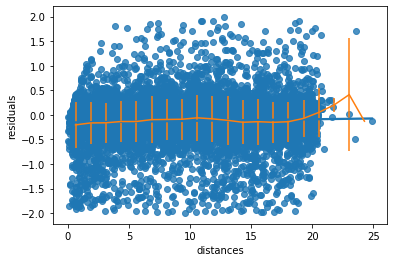

In [68]:
x_centr = []
y_mean = []
y_std = []

for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    centr = (right -left)/2 +left
    x_centr.append(centr)
    mean = df[(df['distances'] >= left) & (df['distances'] <= right)]['residuals'].mean()
    y_mean.append(mean)
    std = df[(df['distances'] >= left) & (df['distances'] <= right)]['residuals'].std()
    y_std.append(std)
    
x = np.array(x_centr)
y = np.array(y_mean)
err_y = np.array(y_std)
print("x: ", x, '\n')
print("y: ", y, '\n')
print("err_y: ", err_y)

#plot profile on top of scatter plot
ax = sns.regplot(x='distances', y='residuals', data=df)
ax.errorbar(x, y, err_y)

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


/tmp/ipykernel_3995/3319665008.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


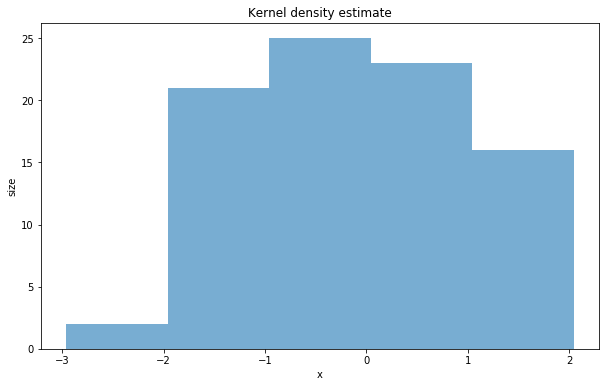

In [69]:
N = 90
x = np.random.normal(0,1,N)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6)) 
h, bins, _ = ax.hist(x, bins=np.arange(x.min(), x.max()), alpha=0.6)
ax.set_title('Kernel density estimate')
ax.set_xlabel('x')
ax.set_ylabel('size')
fig.show()

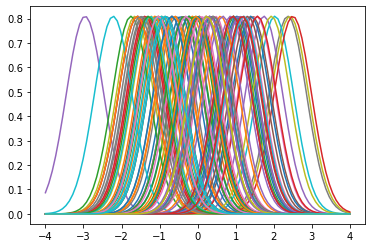

Integral:  89.9798046704602
Histogram:  87.0


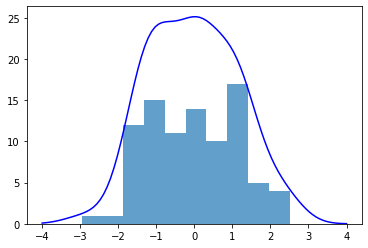

In [70]:
gauss = []

for i in x:
    a = np.linspace(-4, 4, N)
    t = stats.norm.pdf(a, i, 1.06*x.std()*x.size**(-(1/5)))
    gauss.append(t)
    plt.plot(a, t, '-')
plt.show()
gauss = np.array(gauss)
s = np.sum(gauss, axis=0)
step = bins[1] - bins[0]
print("Integral: ", scipy.integrate.trapz(s*step, a))
print("Histogram: ", np.sum(step*h))
plt.hist(x, alpha = 0.7)
plt.plot(a, s*step, '-b')